In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
(all_images, all_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
all_images = all_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [4]:
num_classes = 10
encoded_labels = to_categorical(all_labels, num_classes)
test_encoded_labels = to_categorical(test_labels, num_classes)

In [5]:
train_images, val_images, train_labels, val_labels = train_test_split(
    all_images, encoded_labels, test_size=0.2, random_state=42
)

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.8873 - loss: 0.3900 - val_accuracy: 0.9797 - val_loss: 0.0690
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9812 - loss: 0.0605 - val_accuracy: 0.9842 - val_loss: 0.0542
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9878 - loss: 0.0406 - val_accuracy: 0.9847 - val_loss: 0.0525
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - accuracy: 0.9909 - loss: 0.0287 - val_accuracy: 0.9872 - val_loss: 0.0438
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9927 - loss: 0.0232 - val_accuracy: 0.9867 - val_loss: 0.0458
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - accuracy: 0.9937 - loss: 0.0200 - val_accuracy: 0.9879 - val_loss: 0.0428
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 27ms/step - accuracy: 0.9956 - loss: 0.0152 - val_accuracy: 0.9867 - val_loss: 0.0459
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9967 -

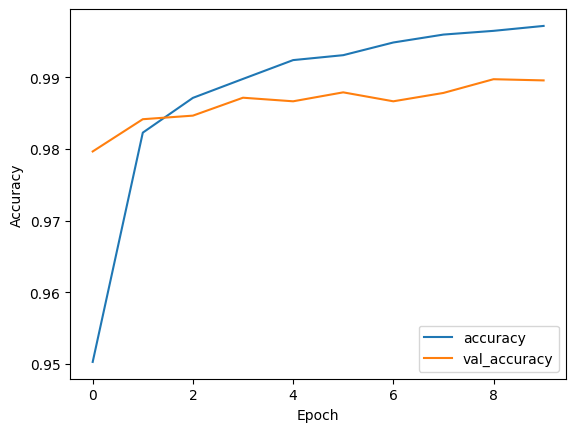

In [7]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels))

loss, accuracy = model.evaluate(test_images, test_encoded_labels, verbose=0)
print(f'테스트 손실: {loss:.4f}')
print(f'테스트 정확도: {accuracy:.4f}')

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [8]:
predictions_categorical = model.predict(test_images)
predictions = np.argmax(predictions_categorical, axis=1)

cm = confusion_matrix(test_labels, predictions)
cm

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


array([[ 977,    0,    1,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1129,    1,    0,    0,    0,    2,    1,    2,    0],
       [   0,    1, 1020,    2,    0,    0,    0,    7,    2,    0],
       [   0,    0,    0, 1003,    0,    5,    0,    1,    1,    0],
       [   0,    0,    0,    0,  973,    0,    0,    2,    1,    6],
       [   1,    0,    0,    5,    0,  881,    1,    1,    2,    1],
       [   5,    2,    0,    1,    2,    3,  942,    0,    3,    0],
       [   0,    2,    2,    0,    0,    0,    0, 1021,    1,    2],
       [   3,    0,    2,    0,    0,    0,    0,    2,  965,    2],
       [   0,    1,    1,    0,    6,    1,    0,    4,    3,  993]])